# Multiple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics
import statsmodels.api as sm

In [4]:
Lab_data = pd.read_csv("ML_Linear_Regression_Case_Study_1.csv")

In [4]:
Lab_data.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [5]:
Lab_data.tail()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
15987,22,HighSchool,black,NotHispanic,NotMarried,0,3975.352,6801.435,2757.438
15988,20,HighSchool,black,NotHispanic,Married,0,1445.939,11832.240,6895.072
15989,37,HighSchool,NotBlack,NotHispanic,NotMarried,0,1733.951,1559.371,4221.865
15990,47,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16914.350,11384.660,13671.930
15991,40,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,13628.660,13144.550,7979.724


In [6]:
Lab_data.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [7]:
Lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
Lab_data.shape

(15992, 9)

In [11]:
## Inline Plots ## 
%matplotlib inline

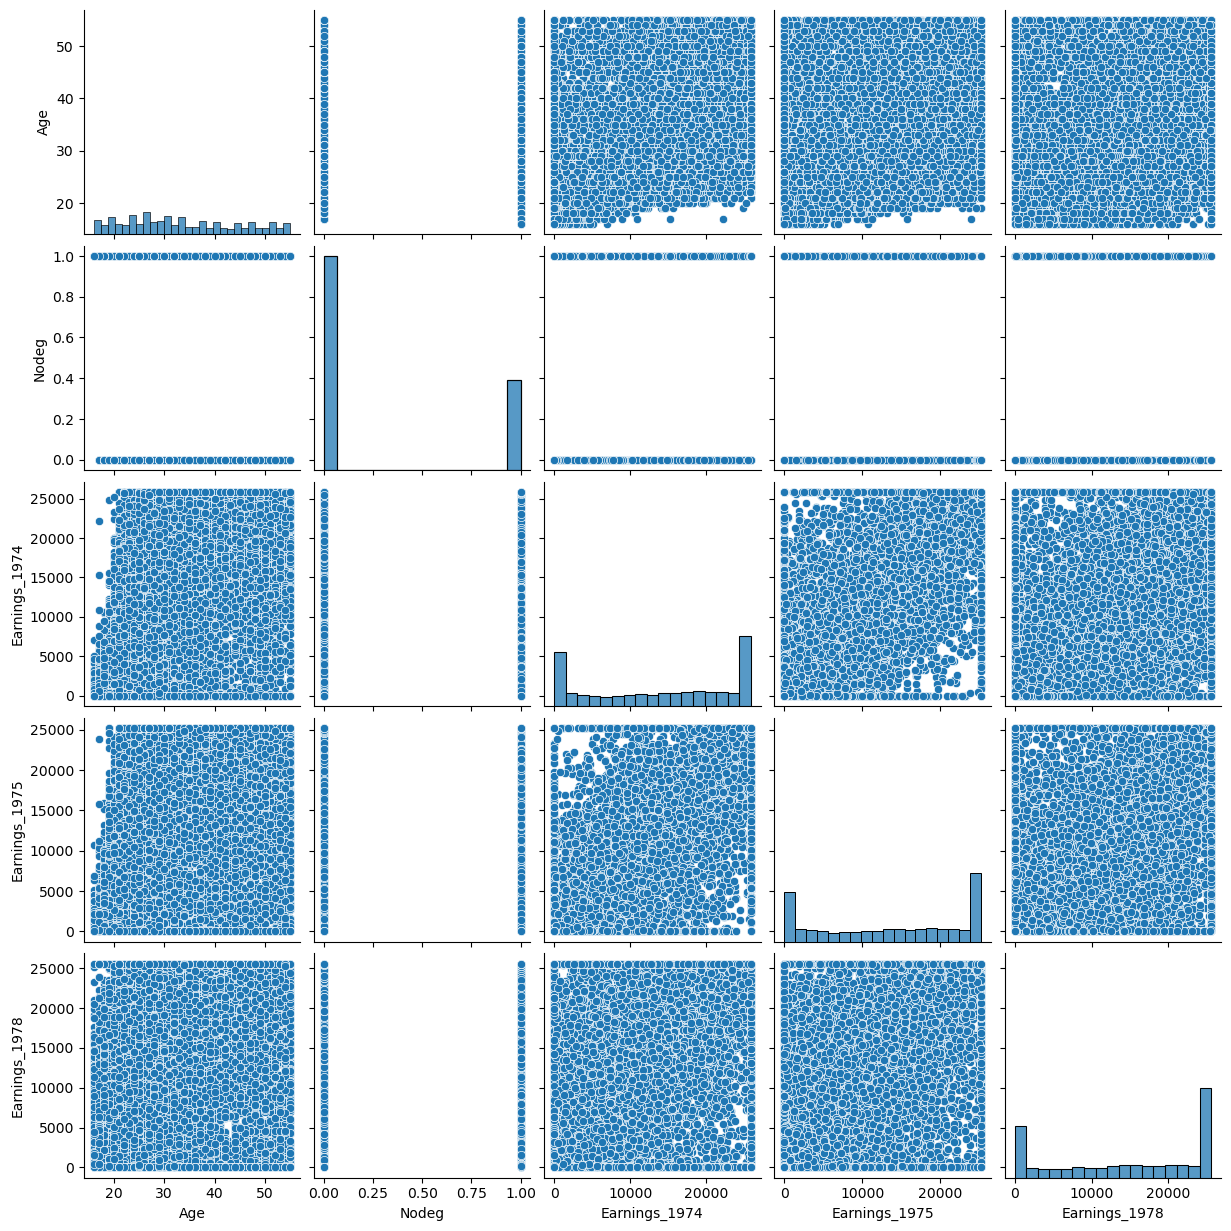

In [12]:
sns.pairplot(Lab_data)

# Let us look at scatter plot for specific variables since we want to see if we can predict 1978 earnings

In [5]:
Lab_data.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

C:\Users\Sohail\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


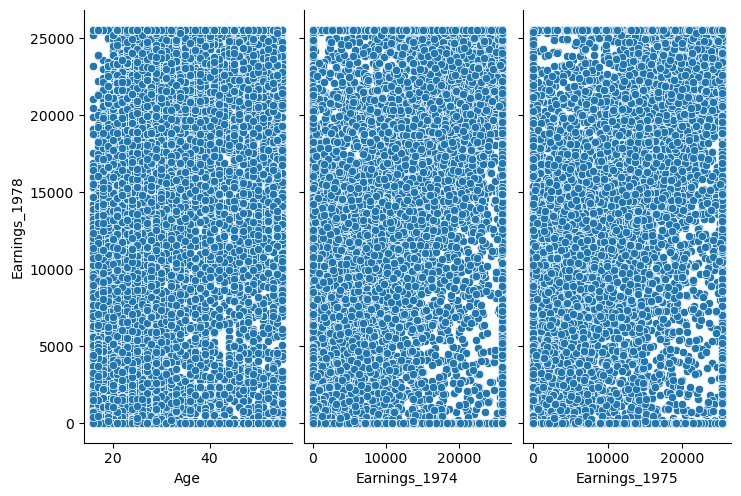

In [14]:
sns.pairplot(Lab_data, x_vars = ['Age', 'Earnings_1974', 'Earnings_1975'], y_vars = 'Earnings_1978', size = 5, aspect = 0.5, kind = 'scatter')

C:\Users\Sohail\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


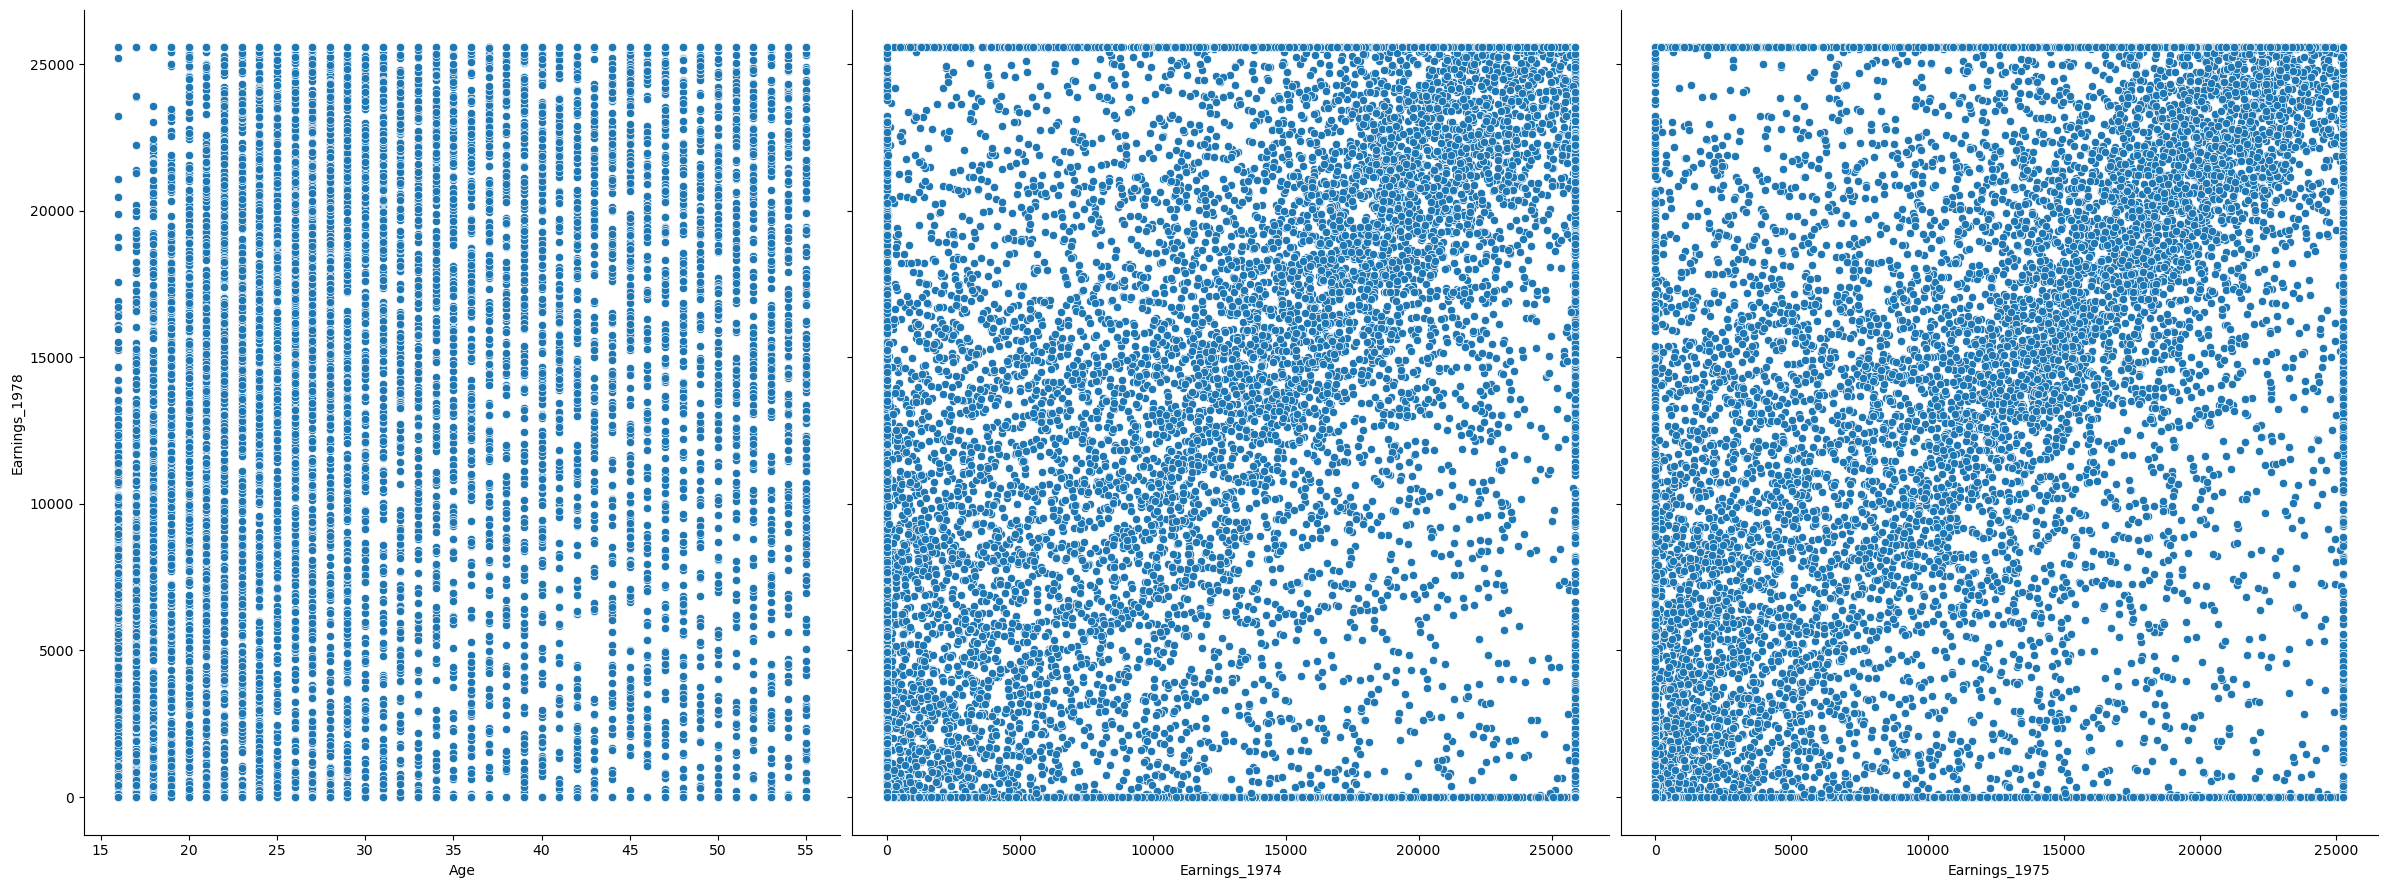

In [15]:
## Since above plot was not clear so hence have changed size and aspect

sns.pairplot(Lab_data, x_vars = ['Age', 'Earnings_1974', 'Earnings_1975'], y_vars = 'Earnings_1978', size = 9, aspect = 0.9, kind = 'scatter')

<Axes: >

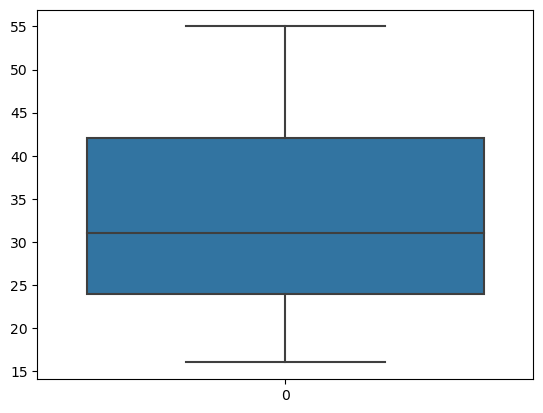

In [17]:
# BOX PLOT

sns.boxplot(data = Lab_data['Age'])

<Axes: >

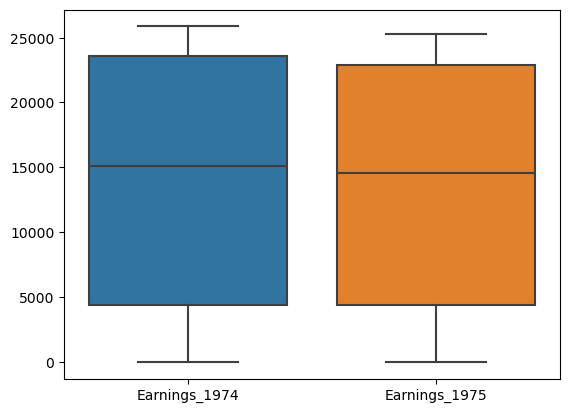

In [18]:
sns.boxplot(data = Lab_data[['Earnings_1974', 'Earnings_1975']], orient = "v") # v = vertical

<Axes: xlabel='Race', ylabel='Earnings_1978'>

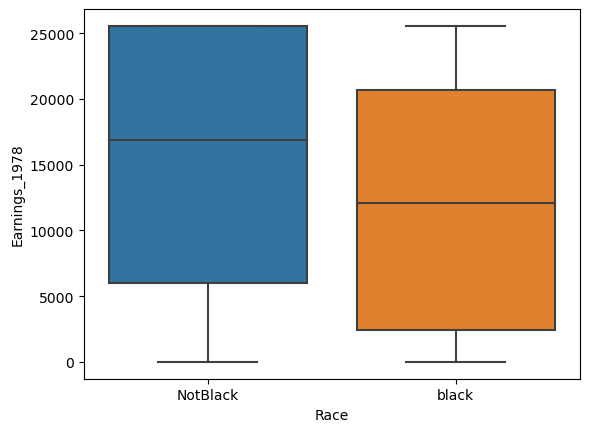

In [21]:
sns.boxplot(x = Lab_data['Race'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='Hisp', ylabel='Earnings_1978'>

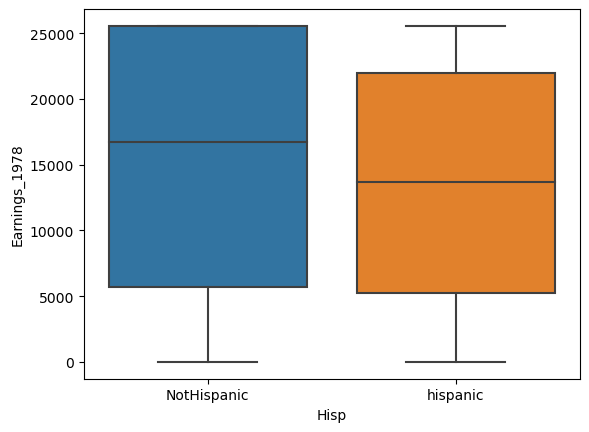

In [22]:
sns.boxplot(x = Lab_data['Hisp'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='Nodeg', ylabel='Earnings_1978'>

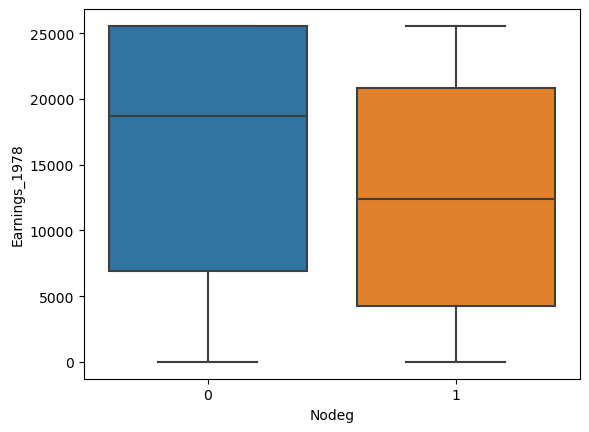

In [23]:
sns.boxplot(x = Lab_data['Nodeg'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='MaritalStatus', ylabel='Earnings_1978'>

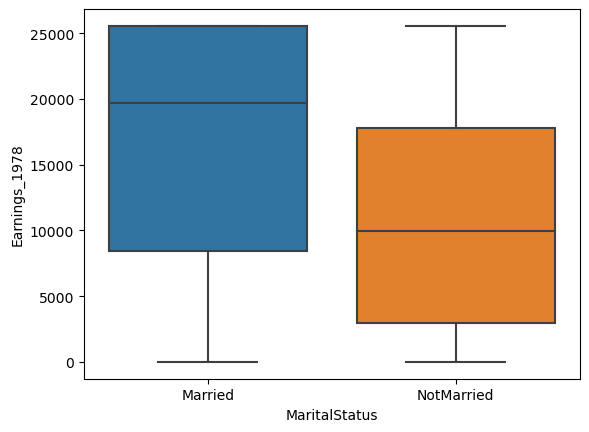

In [24]:
sns.boxplot(x = Lab_data['MaritalStatus'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='MaritalStatus', ylabel='Earnings_1978'>

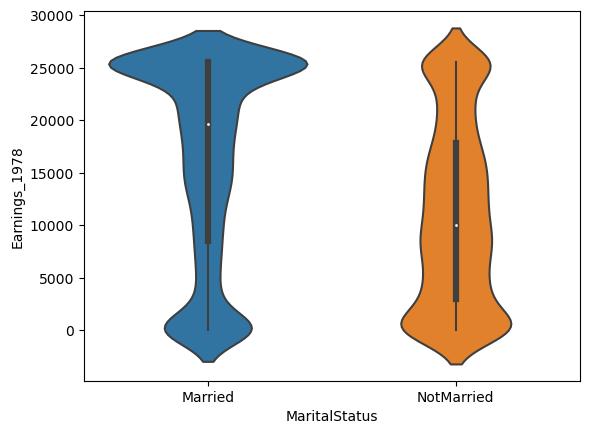

In [25]:
## TO SIMPLY CONFIRM POLARITY AS SEEN IN BOX PLOT

sns.violinplot(x = Lab_data['MaritalStatus'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='Race', ylabel='Earnings_1978'>

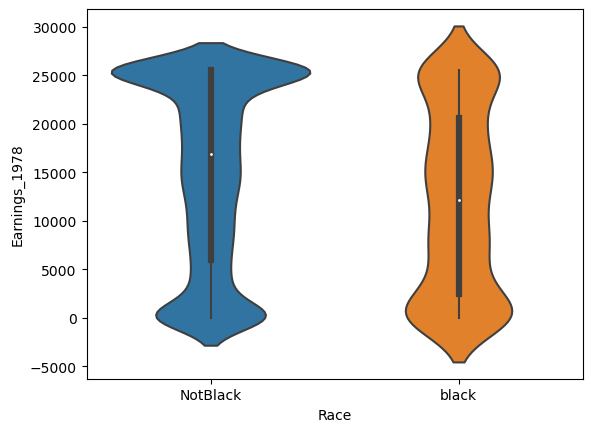

In [26]:
sns.violinplot(x = Lab_data['Race'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='Nodeg', ylabel='Earnings_1978'>

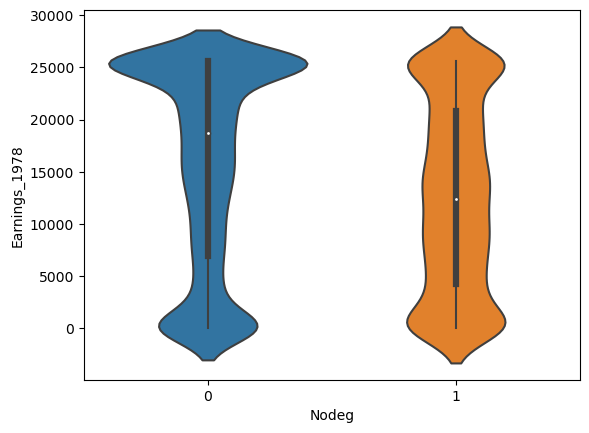

In [27]:
sns.violinplot(x = Lab_data['Nodeg'], y = Lab_data['Earnings_1978'])

<Axes: xlabel='Hisp', ylabel='Earnings_1978'>

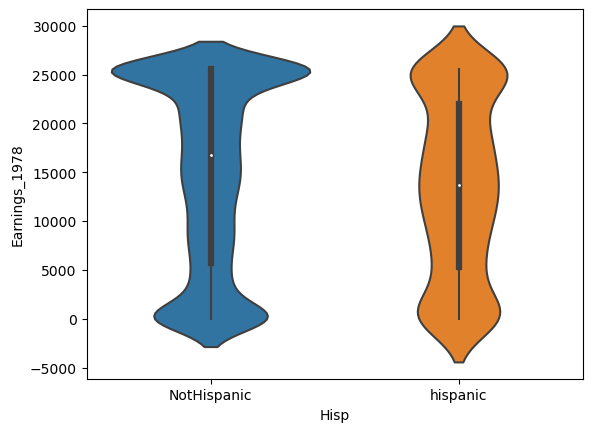

In [28]:
sns.violinplot(x = Lab_data['Hisp'], y = Lab_data['Earnings_1978'])

<Axes: >

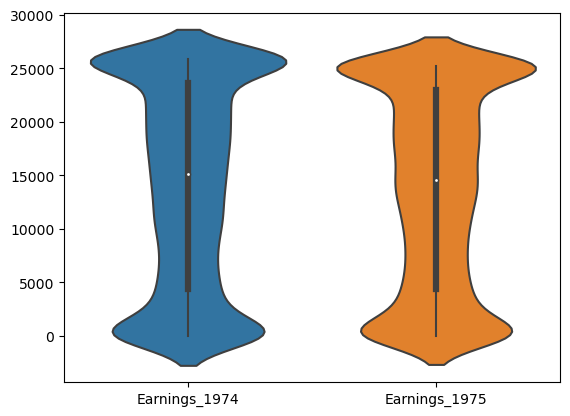

In [29]:
sns.violinplot(data = Lab_data[['Earnings_1974', 'Earnings_1975']], orient = "v")

<Axes: xlabel='Eduacation', ylabel='Earnings_1978'>

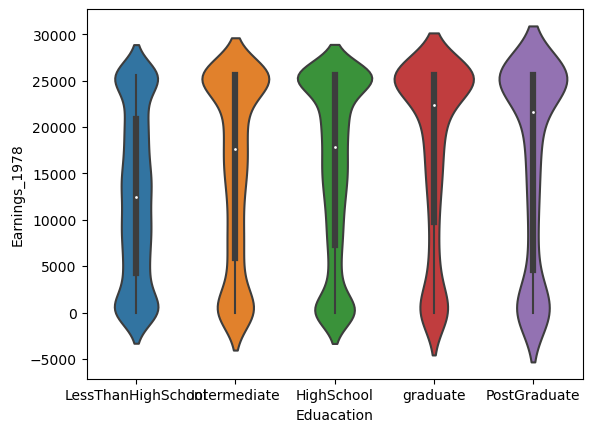

In [30]:
sns.violinplot(x = Lab_data['Eduacation'], y = Lab_data['Earnings_1978'])

In [13]:
## We need continuous variables for Regression ## So, we need to split the dataset as numeric and categorical

Lab_data_num = Lab_data[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978']]

In [15]:
Lab_data_num.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,1,21516.670,25243.550,25564.670
1,21,0,3175.971,5852.565,13496.080
2,38,0,23039.020,25130.760,25564.670
3,48,1,24994.370,25243.550,25564.670
4,18,1,1669.295,10727.610,9860.869


In [16]:
## Change Categorical data to numeric using the DUMMY Variable concept

Lab_data_dummy = pd.get_dummies(Lab_data[['Eduacation', 'Race', 'Hisp', 'MaritalStatus']])

In [17]:
Lab_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Eduacation_HighSchool          15992 non-null  uint8
 1   Eduacation_Intermediate        15992 non-null  uint8
 2   Eduacation_LessThanHighSchool  15992 non-null  uint8
 3   Eduacation_PostGraduate        15992 non-null  uint8
 4   Eduacation_graduate            15992 non-null  uint8
 5   Race_NotBlack                  15992 non-null  uint8
 6   Race_black                     15992 non-null  uint8
 7   Hisp_NotHispanic               15992 non-null  uint8
 8   Hisp_hispanic                  15992 non-null  uint8
 9   MaritalStatus_Married          15992 non-null  uint8
 10  MaritalStatus_NotMarried       15992 non-null  uint8
dtypes: uint8(11)
memory usage: 171.9 KB


In [35]:
## Now Let's confirm is it done or not

Lab_data_dummy.head()

,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,0,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,1,0,1,0
3,0,0,1,0,0,1,0,1,0,1,0
4,0,0,1,0,0,1,0,1,0,1,0


In [36]:
Lab_data_dummy.tail()

,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
15987,1,0,0,0,0,0,1,1,0,0,1
15988,1,0,0,0,0,0,1,1,0,1,0
15989,1,0,0,0,0,1,0,1,0,0,1
15990,0,0,1,0,0,1,0,1,0,1,0
15991,0,0,1,0,0,1,0,1,0,0,1


## Now join the dataframes column-wise

In [18]:
Lab_data_final = pd.concat([Lab_data_num, Lab_data_dummy], axis = 1)

In [19]:
Lab_data_final.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
1,21,0,3175.971,5852.565,13496.080,0,1,0,0,0,1,0,1,0,0,1
2,38,0,23039.020,25130.760,25564.670,1,0,0,0,0,1,0,1,0,1,0
3,48,1,24994.370,25243.550,25564.670,0,0,1,0,0,1,0,1,0,1,0
4,18,1,1669.295,10727.610,9860.869,0,0,1,0,0,1,0,1,0,1,0


In [39]:
Lab_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15992 non-null  int64  
 1   Nodeg                          15992 non-null  int64  
 2   Earnings_1974                  15992 non-null  float64
 3   Earnings_1975                  15992 non-null  float64
 4   Earnings_1978                  15992 non-null  float64
 5   Eduacation_HighSchool          15992 non-null  uint8  
 6   Eduacation_Intermediate        15992 non-null  uint8  
 7   Eduacation_LessThanHighSchool  15992 non-null  uint8  
 8   Eduacation_PostGraduate        15992 non-null  uint8  
 9   Eduacation_graduate            15992 non-null  uint8  
 10  Race_NotBlack                  15992 non-null  uint8  
 11  Race_black                     15992 non-null  uint8  
 12  Hisp_NotHispanic               15992 non-null 

## X and Y variable split for running Linear Regression

In [25]:
X = Lab_data_final[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Eduacation_HighSchool',
                    'Eduacation_Intermediate', 'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate', 
                    'Eduacation_graduate', 'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic', 'Hisp_hispanic', 
                    'MaritalStatus_Married', 'MaritalStatus_NotMarried']]

In [26]:
Y = Lab_data_final[['Earnings_1978']]

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 100)

In [28]:
from sklearn.linear_model import LinearRegression

lrmcontainer = LinearRegression() ## lrm is Linear Regression Model, Linear Regression Object created
lrmcontainer.fit(X_train, Y_train) ## Fit the model

LinearRegression()

In [29]:
print('Intercept is:', lrmcontainer.intercept_)
print('Coeff_of Determination R2 is:', lrmcontainer.score(X_train, Y_train))
print('Coeff for Variables are:', lrmcontainer.coef_)

Intercept is: [7502.90515638]
Coeff_of Determination R2 is: 0.4796237209695756
Coeff for Variables are: [[-1.05198175e+02 -2.91754984e+02  2.87448995e-01  4.77042357e-01
  -4.06999763e+02 -2.70512443e+02 -2.91754984e+02  5.90886229e+02
   3.78380960e+02  4.55276440e+02 -4.55276440e+02  3.18966611e+02
  -3.18966611e+02 -6.79838205e+00  6.79838205e+00]]


In [30]:
# Seperate the Co-efficients #

Co_Eff = pd.DataFrame(lrmcontainer.coef_.transpose(), X_test.columns, columns = ['Coefficinet'])
Co_Eff

,Coefficinet
Age,-105.198175
Nodeg,-291.754984
Earnings_1974,0.287449
Earnings_1975,0.477042
Eduacation_HighSchool,-406.999763
Eduacation_Intermediate,-270.512443
Eduacation_LessThanHighSchool,-291.754984
Eduacation_PostGraduate,590.886229
Eduacation_graduate,378.380960
Race_NotBlack,455.276440


In [31]:
# Prediction

y_pred = lrmcontainer.predict(X_test)

In [32]:
y_pred

array([[16540.04007348],
       [21097.91690793],
       [21837.01538353],
       ...,
       [16316.77749664],
       [16704.39653637],
       [10399.89541609]])

In [33]:
# Evaluation 

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 5251.856013853334
MSE: 50283398.7266499
RMSE: 7091.078812610243


In [34]:
from sklearn.metrics import r2_score
print('R-Squared:', r2_score(Y_test, y_pred)) ## THIS IS FOR THE TEST DATA

R-Squared: 0.463928908706438


# THESE ARE WAY THROUGH THE ROOF !! :(

In [35]:
# Lets look at the other parameters USING STATS MODELS

X_train_sm = X_train

In [36]:
X_train_sm = sm.add_constant(X_train_sm)

In [37]:
Naya_model = sm.OLS(Y_train, X_train_sm).fit()

In [38]:
Naya_model.params

const                            2756.169241
Age                              -105.198175
Nodeg                              14.486043
Earnings_1974                       0.287449
Earnings_1975                       0.477042
Eduacation_HighSchool             205.482290
Eduacation_Intermediate           341.969611
Eduacation_LessThanHighSchool      14.486043
Eduacation_PostGraduate          1203.368283
Eduacation_graduate               990.863014
Race_NotBlack                    1833.361060
Race_black                        922.808181
Hisp_NotHispanic                 1697.051231
Hisp_hispanic                    1059.118010
MaritalStatus_Married            1371.286239
MaritalStatus_NotMarried         1384.883003
dtype: float64

In [50]:
print(Naya_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:54:39   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<Axes: >

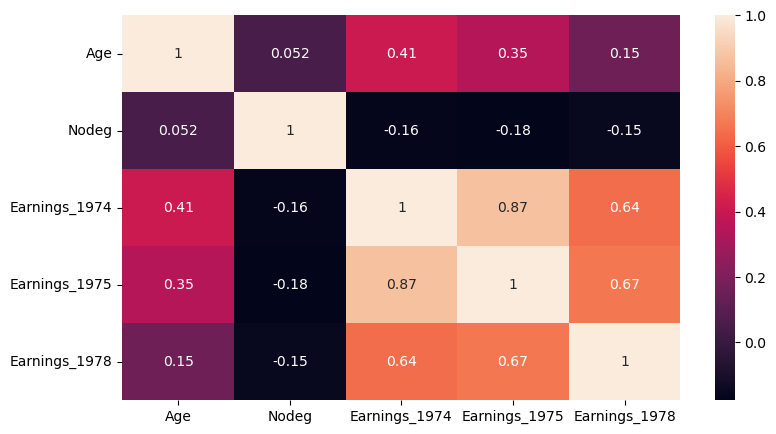

In [46]:
# Let us study the Heat Map Correlations for Multi Collinearity

plt.figure(figsize=(9,5))

sns.heatmap(Lab_data_num.corr(), annot=True)

# 1974 and 1975 are highly correlated with each other..
# this may cause multi-collinearity

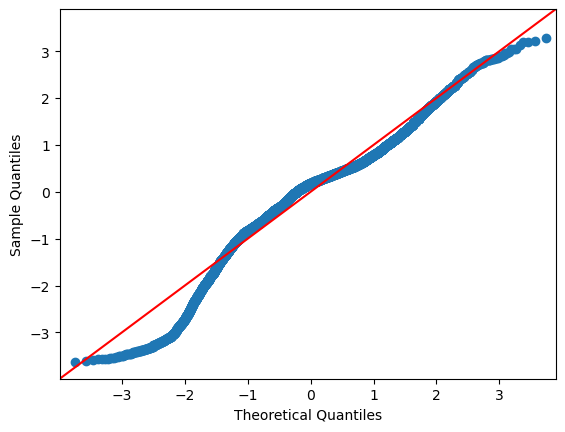

In [51]:
#define residuals
res = Naya_model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

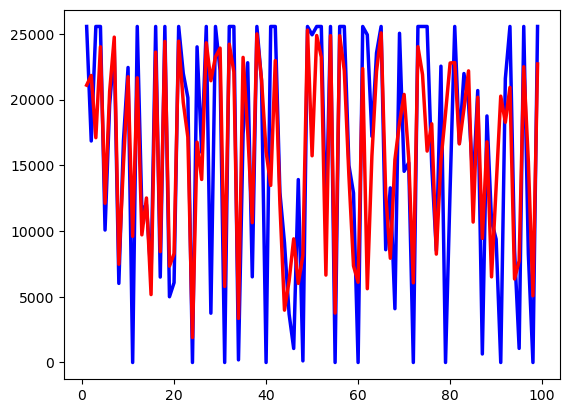

In [54]:
## Not a promising plot ..  so let us plot Actual and predicted .. Since there are many values let us look at 100 random sample

cnt = [i for i in range(1,100,1)]
fig = plt.figure()
plt.plot(cnt, Y_test[1:100], color = 'blue', linewidth = 2.5, linestyle = '-')
plt.plot(cnt, y_pred[1:100], color = 'red', linewidth = 2.5, linestyle = '-')
plt.show()

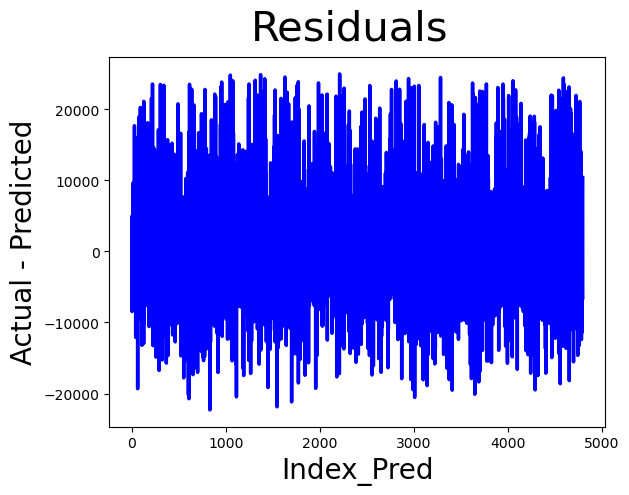

In [58]:
## plotting the residuals 30% of 15992 = 4797 but take 4799 since dimensions vary

cnt = [i for i in range(1,4799,1)]
fig = plt.figure()
plt.plot(cnt, y_pred - Y_test, color = 'blue', linewidth = 2.5, linestyle = '-')

#labling the graph

fig.suptitle('Residuals', fontsize = 30)
plt.xlabel('Index_Pred', fontsize = 20)
plt.ylabel('Actual - Predicted', fontsize = 20)

plt.show()

In [61]:
# VIF (Variance Inflation Factor) measures Multi- Collinearity ; VIF of > 4 means Multi_collinearity exist

from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# we will calculate VIF for each X variable and store in another DF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(2)

C:\Users\91882\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.37,Age
1,inf,Nodeg
2,4.41,Earnings_1974
3,4.18,Earnings_1975
4,inf,Eduacation_HighSchool
5,inf,Eduacation_Intermediate
6,inf,Eduacation_LessThanHighSchool
7,inf,Eduacation_PostGraduate
8,inf,Eduacation_graduate
9,inf,Race_NotBlack


In [47]:
# 1. Remove  Attribute with higher values
# 2. Run attribute p values
# 3. Q-Q plot
# 4. Run Summary and see for R-adj, AIC , BIC , D-W , P-values
# 5. Check if you need to drop other Attributes
# 6. Re-run model
# 7. re-evaluate model
# 8. see if it finally satisfy as a GOOD MODEL